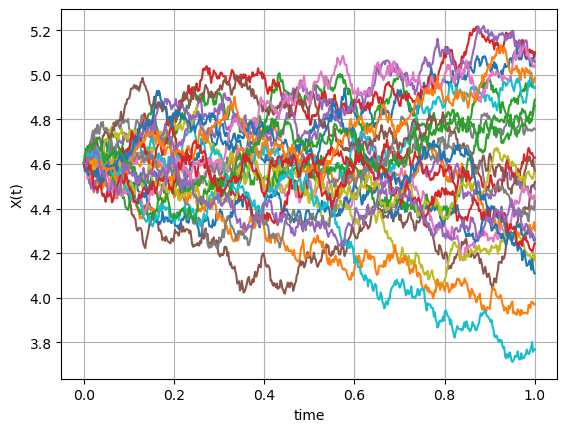

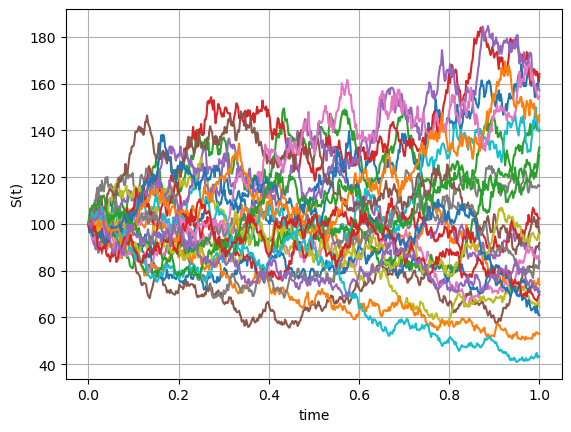

In [27]:
import numpy as np
import matplotlib.pyplot as plt


def GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):    
    
    #np.random.seed(100)
        
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
    
    X[:,0] = np.log(S_0)
    
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):

        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
            
        X[:,i+1] = X[:,i] + (r - 0.5 * sigma **2 ) * dt + sigma * np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] +dt
        
  
    S = np.exp(X)
    paths = {"time":time,"X":X,"S":S}
    return paths

def mainCalculation():
    NoOfPaths = 25
    NoOfSteps = 500
    T = 1
    r = 0.05
    sigma = 0.4
    S_0 = 100
    
    Paths = GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    timeGrid = Paths["time"]
    X = Paths["X"]
    S = Paths["S"]
    
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(S))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    
mainCalculation()

109.56215455555918
104.21874522494281


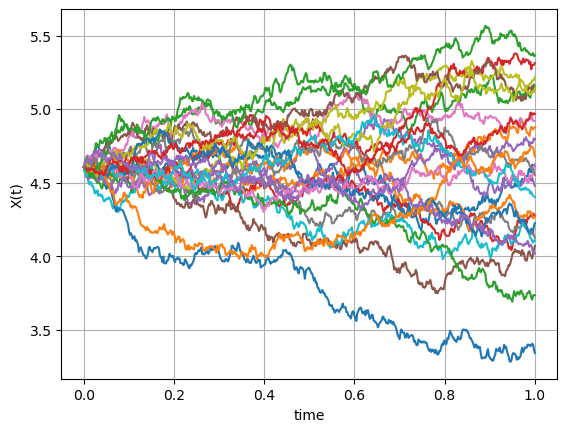

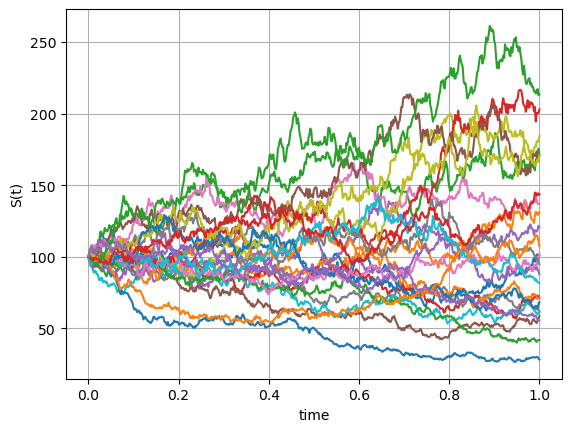

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):    
    
    
    #np.random.seed(1)
        
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
        
    X[:,0] = np.log(S_0)
    
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
            
        X[:,i+1] = X[:,i] + (r - 0.5 * sigma **2 ) * dt + sigma * np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] +dt
        
    
    S = np.exp(X)
    paths = {"time":time,"X":X,"S":S}
    return paths

def mainCalculation():
    NoOfPaths = 25
    NoOfSteps = 500

    T = 1
    r = 0.05
    sigma = 0.4
    S_0 = 100
    
    M = lambda r,t: np.exp(r*t)
    
    Paths = GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    timeGrid = Paths["time"]
    X = Paths["X"]
    S = Paths["S"]
    
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(S))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    
    ES = np.mean(S[:,-1])
    print(ES)
    
    ESM = np.mean(S[:,-1]/M(r,T))
    print(ESM)
    
mainCalculation()

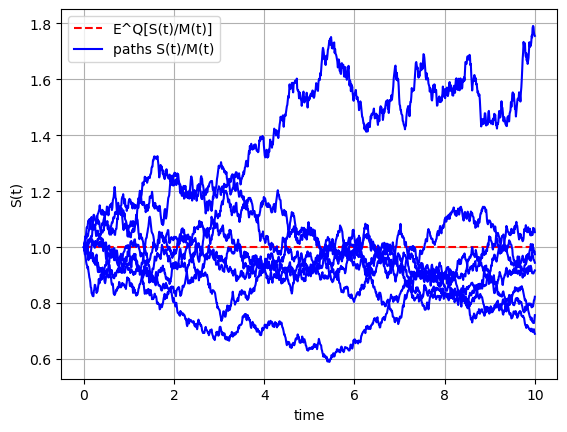

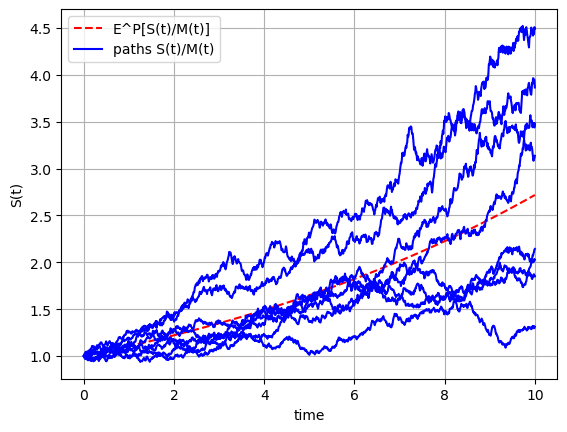

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def GeneratePathsGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
        
    X[:,0] = np.log(S_0)
    
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
     
        X[:,i+1] = X[:,i] + (r - 0.5 * sigma * sigma) * dt + sigma *\
        np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] +dt
        
    S = np.exp(X)
    paths = {"time":time,"S":S}
    return paths
    
def MainCode():
    NoOfPaths = 8
    NoOfSteps = 1000
    S_0       = 1
    r         = 0.05
    mu        = 0.15
    sigma     = 0.1
    T         = 10
    M         = lambda t: np.exp(r * t)
    
    
    pathsQ    = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    S_Q       = pathsQ["S"]
    pathsP = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,mu,sigma,S_0)
    S_P = pathsP["S"]
    time= pathsQ["time"]    
    
    S_Qdisc = np.zeros([NoOfPaths,NoOfSteps+1])
    S_Pdisc = np.zeros([NoOfPaths,NoOfSteps+1])
    i = 0
    for i, ti in enumerate(time):
        S_Qdisc[:, i] = S_Q[:,i]/M(ti) 
        S_Pdisc[:, i] = S_P[:,i]/M(ti) 
    
    plt.figure(1)
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    eSM_Q = lambda t: S_0 * np.exp(r *t) / M(t)
    plt.plot(time,eSM_Q(time),'r--')
    plt.plot(time, np.transpose(S_Qdisc),'blue')   
    plt.legend(['E^Q[S(t)/M(t)]','paths S(t)/M(t)'])
    
    plt.figure(2)
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    eSM_P = lambda t: S_0 * np.exp(mu *t) / M(t)
    plt.plot(time,eSM_P(time),'r--')
    plt.plot(time, np.transpose(S_Pdisc),'blue')   
    plt.legend(['E^P[S(t)/M(t)]','paths S(t)/M(t)'])
    
MainCode()

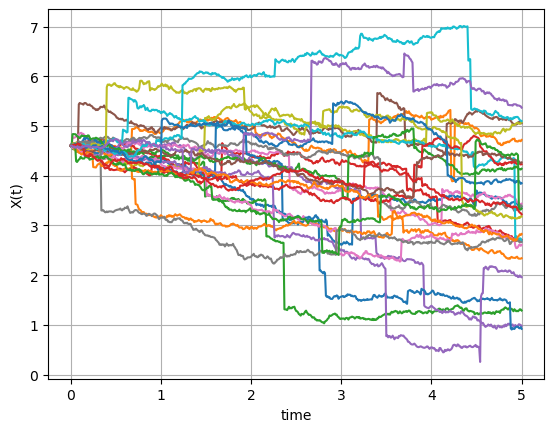

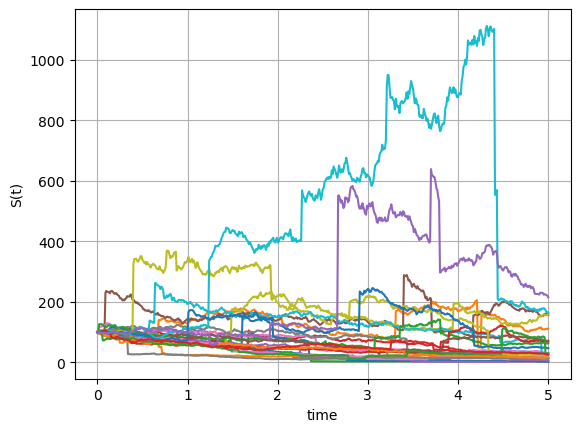

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def GeneratePathsMerton(NoOfPaths,NoOfSteps,S0, T,xiP,muJ,sigmaJ,r,sigma):    
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
                
    dt = T / float(NoOfSteps)
    X[:,0] = np.log(S0)
    S[:,0] = S0
    
    EeJ = np.exp(muJ + 0.5*sigmaJ*sigmaJ)
    
    ZPois = np.random.poisson(xiP*dt,[NoOfPaths,NoOfSteps])
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    
    J = np.random.normal(muJ,sigmaJ,[NoOfPaths,NoOfSteps])
    
    for i in range(0,NoOfSteps):
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        
        X[:,i+1]  = X[:,i] + (r - xiP*(EeJ-1) - 0.5*sigma*sigma)*dt +sigma*np.sqrt(dt)* Z[:,i]\
                    + J[:,i] * ZPois[:,i]
        time[i+1] = time[i] +dt
        
    S = np.exp(X)
    paths = {"time":time,"X":X,"S":S}
    return paths

def mainCalculation():
    NoOfPaths = 25
    NoOfSteps = 500
    T = 5
    xiP = 1
    muJ = 0
    sigmaJ = 0.7
    sigma = 0.2

    S0 =100
    r=0.05
    Paths = GeneratePathsMerton(NoOfPaths,NoOfSteps,S0, T,xiP,muJ,sigmaJ,r,sigma)
    timeGrid = Paths["time"]
    X = Paths["X"]
    S = Paths["S"]
           
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(S))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    
                       
mainCalculation()

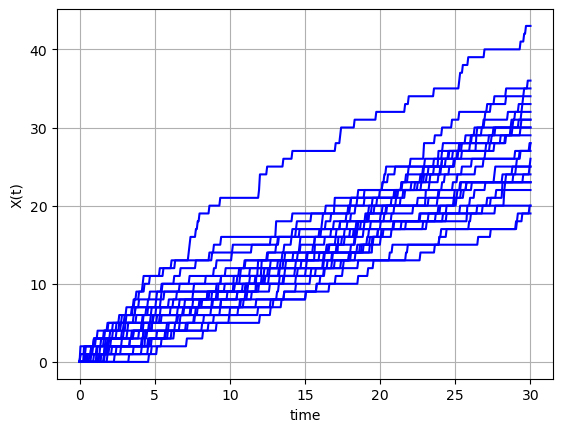

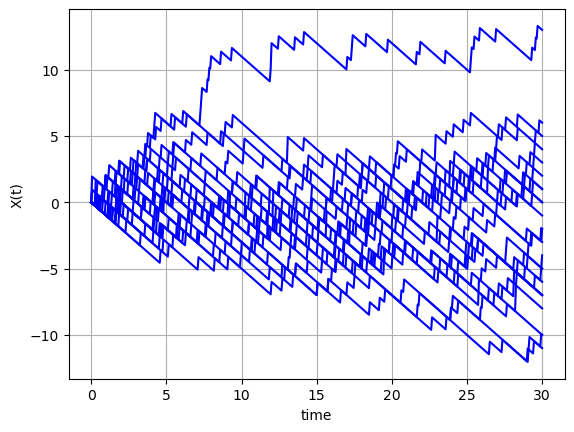

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,xiP):    
    
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    Xc = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
                
    dt = T / float(NoOfSteps)
    
    Z = np.random.poisson(xiP*dt,[NoOfPaths,NoOfSteps])
    
    for i in range(0,NoOfSteps):
        
        X[:,i+1]  = X[:,i] + Z[:,i]
        Xc[:,i+1] = Xc[:,i] -xiP*dt + Z[:,i]
        time[i+1] = time[i] +dt
        
    paths = {"time":time,"X":X,"Xcomp":Xc}
    return paths

def mainCalculation():
    NoOfPaths = 25
    NoOfSteps = 500
    T = 30
    xiP= 1
        
    Paths = GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,xiP)
    timeGrid = Paths["time"]
    X = Paths["X"]
    Xc = Paths["Xcomp"]
       
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X),'-b')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(Xc),'-b')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
                     
mainCalculation()

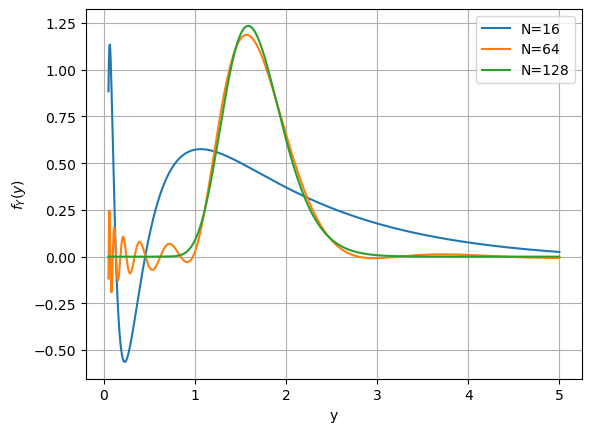

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

def COSDensity(cf,x,N,a,b):
    i = complex(0.0,1.0) 
    k = np.linspace(0,N-1,N)
    u = np.zeros([1,N])
    u = k * np.pi / (b-a)
        
    F_k    = 2.0 / (b - a) * np.real(cf(u) * np.exp(-i * u * a));
    F_k[0] = F_k[0] * 0.5; 
    
    f_X = np.matmul(F_k , np.cos(np.outer(u, x - a )))
        
    return f_X
    
def mainCalculation():


    i = complex(0.0, 1.0) 
    
    a = -10
    b = 10
    
    N = [16, 64, 128]
    
    mu = 0.5
    sigma = 0.2 
        
    cF = lambda u : np.exp(i * mu * u - 0.5 * np.power(sigma,2.0) * np.power(u,2.0));
    
    
    y = np.linspace(0.05,5,1000)
        
    plt.figure(1)
    plt.grid()
    plt.xlabel("y")
    plt.ylabel("$f_Y(y)$")
    for n in N:
        f_Y = 1/y * COSDensity(cF,np.log(y),n,a,b)

        plt.plot(y,f_Y)
    plt.legend(["N=%.0f"%N[0],"N=%.0f"%N[1],"N=%.0f"%N[2]])
    
    
mainCalculation()